<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/Multivariate_Analysis_Formal_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

多元统计分析的内容十分丰富，主要包括判别分析、聚类分析、主成分分析、因子分析、回归分析预测方法、方差分析、典型相关分析、时间序列等。具体方法的选择也与问题的形式有关，这篇文章里我会结合案例去说明和分析，主要是数模和kaggle的素材为主，**这个笔记本不侧重于概念的理解**，（一般我会把理解写成博客），只侧重应用和流程化  :)

2022/9/10 更新：

说起来也是鸽了一段时间了，( •̀ ω •́ )在数模之前把这个专题完善起来吧。


找资料的方法：
- 知网：论文、数据也可以
- 后裔爬虫
- kaggle
- Google

文章的结构可以分为以下几个章节：
- 假设检验和方差分析的介绍(扶贫)
- 数据分析流水线的介绍(结合不同形式问题的案例)
- 具体用到的多元分析方法的介绍(数学推导+代码封装)

主要的案例有：
- 数模高教杯2005B，2012A，2020C，2021C，2021E
- kaggle上的一些比赛的notebook

> notebook用到的数据集是red wine dataset 和 AB test dataset，都是kaggle上面的。

In [7]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/MA")
!ls

 ab_testing.xlsx	   'SimHei .ttf'
 example_retail_sales.csv  'winequality-red .csv'


In [ ]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-09-12 13:11:27--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  23.7MB/s    in 0.4s    

2022-09-12 13:11:27 (23.7 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/drive/MyDrive/dataset/MathModel/MA/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 173MB/s

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

In [ ]:
red_wine = pd.read_csv("winequality-red .csv")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Statistics Knowledge


第一部分是统计学知识扶贫😋，其实不论是数模还是kaggle，都会碰到需要进行对数据的各种统计学分析，然后各种统计假设检验多种多样，很容易搞不清，这里就来结合案例做个详细的tutorial。首先会给出整体的big picture， 然后对于常用的假设检验会进行详细的介绍。

> 这个系列真的是很棒，这里挑其中的假设检验部分来说说
>
>https://www.scribbr.com/statistics/statistical-tests/

统计测试被用在假设检验测试中，它们可以用来
- 决定一个预测变量(自变量)是不是和一个因变量具有显著的统计关系：比如regression以后的F-test。
- 估计两个或多个数据分布的差异：比如kaggle经常进行的T-test。


### 什么是假设检验

看这个解释的很详细
>https://www.zhihu.com/question/323210651/answer/2404265924
>
>[Significant Value](https://zhuanlan.zhihu.com/p/61524138)


![](https://picx.zhimg.com/v2-d102fdcf2d27c04fb2766ed82008e0db_r.jpg?source=1940ef5c)

![](https://picx.zhimg.com/v2-8941d9d302bb95b4334daae26e718fce_r.jpg?source=1940ef5c)

## 怎么选择统计检验
To determine which statistical test to use, you need to know:

- hether your data meets certain assumptions.
- the types of variables that you’re dealing with.

### Statistical assumptions
Statistical tests make some common assumptions about the data they are testing:

1. Independence of observations (a.k.a. no autocorrelation): The observations/variables you include in your test are not related (for example, multiple measurements of a single test subject are not independent, while measurements of multiple different test subjects are independent).
2. Homogeneity of variance: the variance within each group being compared is similar among all groups. If one group has much more variation than others, it will limit the test’s effectiveness.
3. Normality of data: the data follows a normal distribution (a.k.a. a bell curve). This assumption applies only to quantitative data.
If your data do not meet the assumptions of normality or homogeneity of variance, you may be able to perform a nonparametric statistical test, which allows you to make comparisons without any assumptions about the data distribution.

If your data do not meet the assumption of independence of observations, you may be able to use a test that accounts for structure in your data (repeated-measures tests or tests that include blocking variables).

If your data do not meet the assumption of independence of observations, you may be able to use a test that accounts for structure in your data (repeated-measures tests or tests that include blocking variables)




## 选择怎样的统计测试
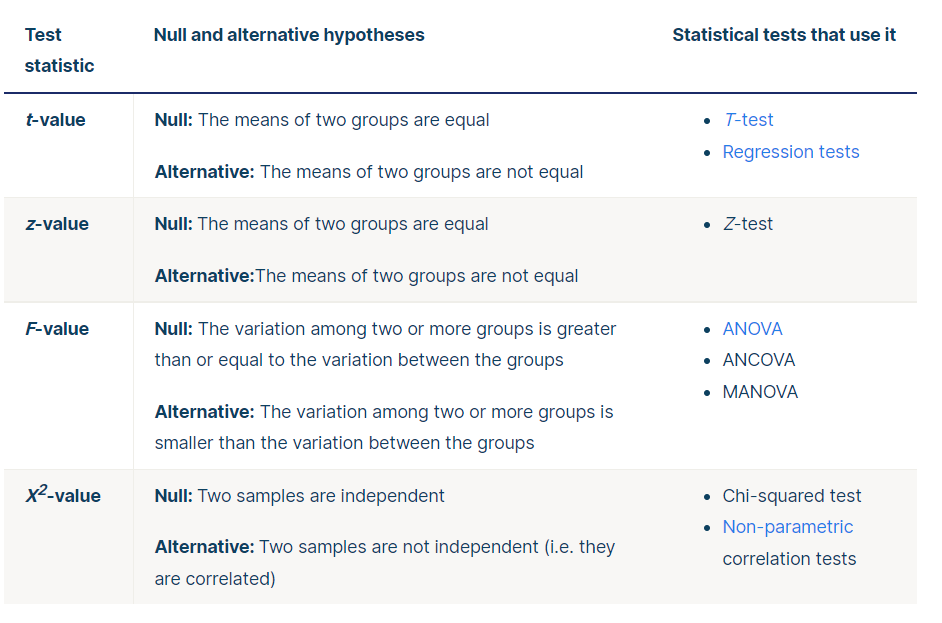





### **Choosing a parametric test: regression, comparison, or correlation**

Parametric tests usually have stricter requirements than nonparametric tests, and are able to make stronger inferences from the data. They can only be conducted with data that adheres to the common assumptions of statistical tests.

The most common types of parametric test include regression tests, comparison tests, and correlation tests.

#### Regression tests
Regression tests look for cause-and-effect relationships. They can be used to estimate the effect of one or more continuous variables on another variable.

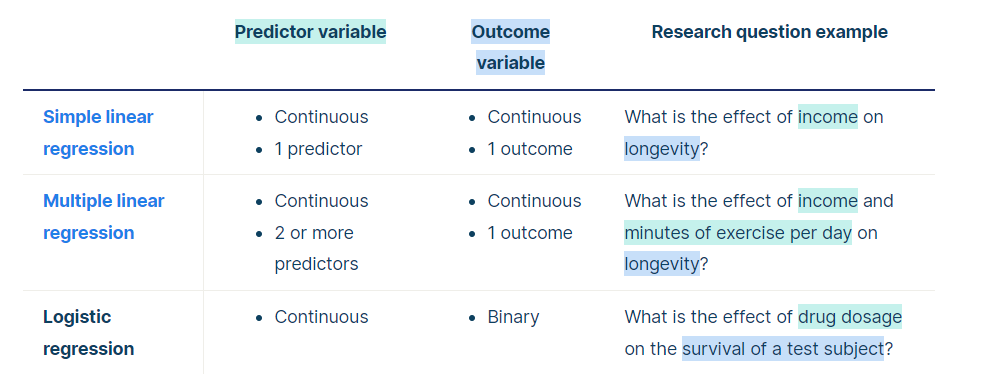

#### Comparison tests
Comparison tests look for differences among group means. They can be used to test the effect of a categorical variable on the mean value of some other characteristic.

T-tests are used when comparing the means of precisely two groups (e.g. the average heights of men and women). ANOVA and MANOVA tests are used when comparing the means of more than two groups (e.g. the average heights of children, teenagers, and adults).



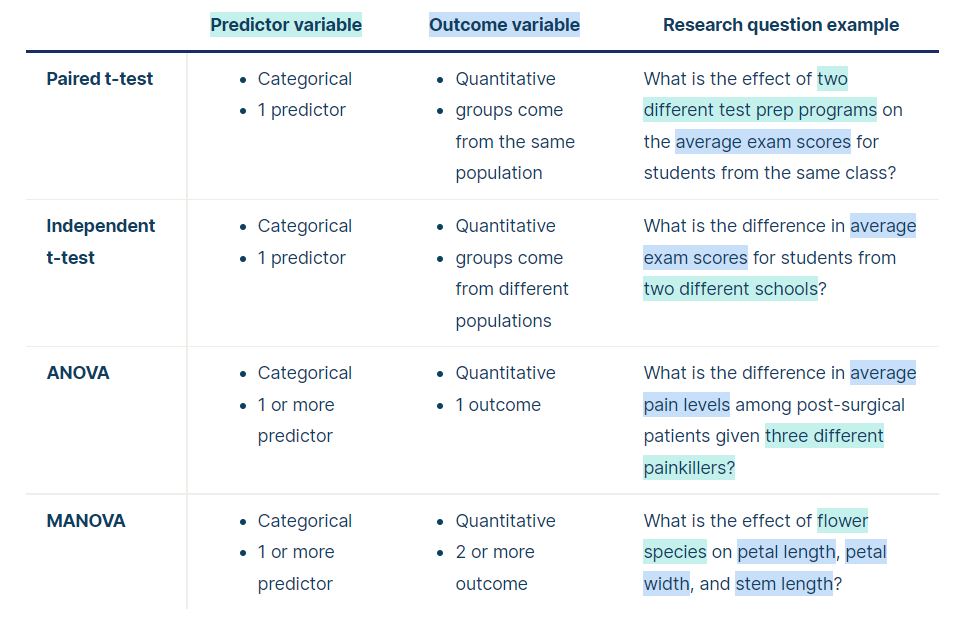

#### Correlation tests
Correlation tests check whether variables are related without hypothesizing a cause-and-effect relationship.

These can be used to test whether two variables you want to use in (for example) a multiple regression test are autocorrelated.



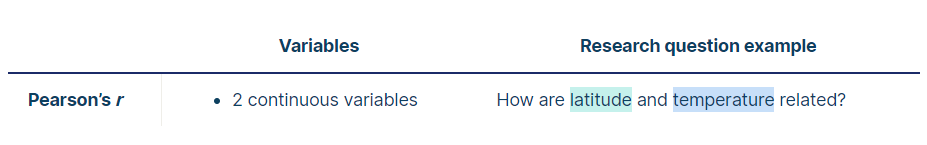

### Choosing a nonparametric test
Non-parametric tests don’t make as many assumptions about the data, and are useful when one or more of the common statistical assumptions are violated. However, the inferences they make aren’t as strong as with parametric tests.



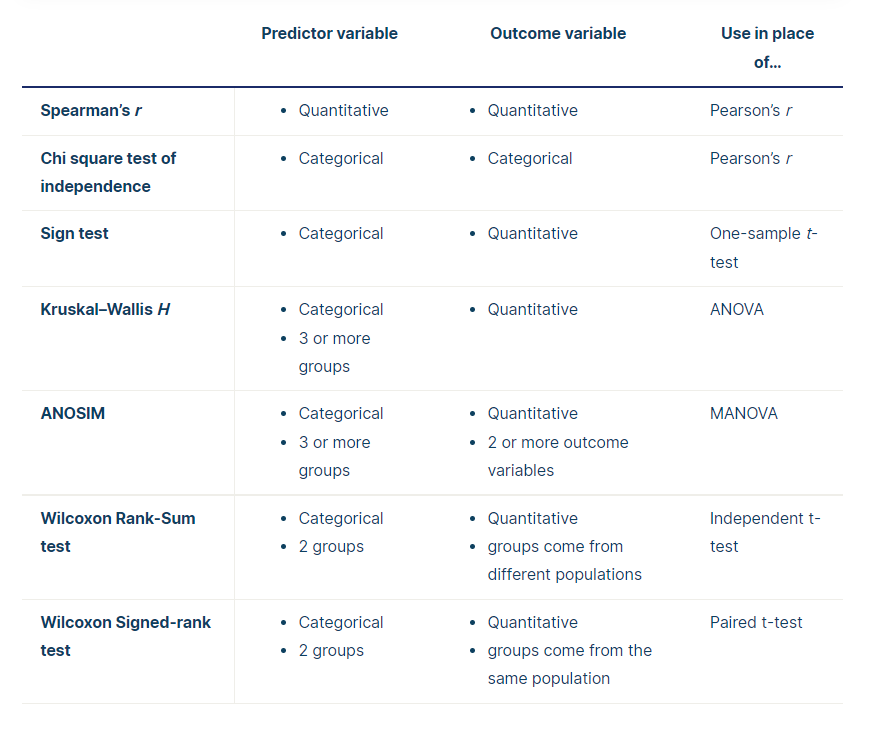

### Flowchart: choosing a statistical test
This flowchart helps you choose among parametric tests. For nonparametric alternatives, check the table above.


![](https://cdn.scribbr.com/wp-content/uploads/2020/01/flowchart-for-choosing-a-statistical-test.png)

## 常用假设检验的介绍

上面说了那么多，首先是为了获得整体的感知，接下来将会具体地介绍一些常用的假设检验：
- 正态性：KS检验，QQ plot
- 相关性：Pearson、Spearman和Kendall系数
- 卡方检验
- F检验
- T检验

以及和对应统计量(P-value,T-value,F-value...)的关系。

### 正态性



#### **K-S正态检验：**
（1）原假设和备择假设
$$
H_0: F(x)=F_0(x), H_1: F(x) \neq F_0(x)
$$
其中 $F_0(x)$ 是给定的连续分布函数。

（2）选取检验统计量
$$
D_n=\sup \left|F_n(x)-F_0(x)\right|
$$
当 $H_0$ 为真时, 检验统计量的极限分布为
$$
\lim _{n \rightarrow \infty} P\left(\sqrt{n} D_n \geq t\right)=1-2 \sum_{i=1}^{\infty}(-1)^{i-1} e^{-2 i^2 t^2}, t>0 \text { 。 }
$$
令 $F(t)$ 表示上式右端的值。

（3）确定拒绝域
给定显著性水平 $\alpha$, 使 $P\left(\sqrt{n} D_n \geq t_\alpha\right)=\alpha$, 从表中查出临界值 $t_\alpha$, 则拒绝域为 $\left[t_\alpha,+\infty\right)$

(4) 计算检验统计量的观测值

(5) 作判断
如果检验统计量的观测值落在拒绝域中, 则拒绝原假设, 否则不拒绝原假设。

In [ ]:
from scipy.stats import kstest
import numpy as np
 
x = np.random.normal(0,1,1000)
test_stat = kstest(x, 'norm')
test_stat
# 不能拒绝假设，也就是说x服从正态分布

KstestResult(statistic=0.025904455740346943, pvalue=0.505026945703954)

#### **QQ plot检验：**

1、 将原序列按开序重新排列
$$
X_1 \leq X_2 \leq \ldots \leq X_i \leq \ldots \leq X_N
$$
2、计算 $Q Q$ 序列
样木本均值和标准差分别为 $X=\frac{\sum_{i=1}^N X i}{N}, \sigma=\sqrt{\frac{\sum(X i-\bar X)^2}{N-1}}$
分位数 $Q_i=\frac{x i-\bar x}{\sigma}, t_i=\frac{i-0.5}{N}$, 通过正态分布表可以查得 $t_i$ 对应的分位数 $Q_i^{\prime}$

3、画出QQ图：

即Q--Q'图，与y = x线进行比较，若基本吻合则原序列服从正态分布，若相差较大则不服从正态分布。

4.采用Michael拟合优度检验方法给出QQ图的接受区间。

Michael 拟合优度统计量:
 
$$D_{sp}=max|r_i-s_i|$$

通过它可以在图上加上100(1-a)\%接受区间，接受区间界线对应的值计算公式如下:
$$
\mathrm{X}=\mu+\sigma \mathrm{F}_0^{-1}\left\{\sin ^2\left\{\arcsin \left[\mathrm{F}_0^{1 / 2}(\mathrm{q_i})\right] \pm \pi / 2 \mathrm{~d}_{\alpha} \quad\right\}\right\}
$$

In [ ]:
# 见下面链接画qq图的部分
# https://github.com/XuRui314/MathematicalModeling/blob/main/%E6%95%B0%E6%A8%A1%E7%AC%AC%E4%BA%94%E6%AC%A1%E7%BB%83%E4%B9%A0.ipynb

### 相关性分析的介绍

#### **Pearson相关系数**
适用连续变量的相关性，假设主要就是正态性，这个可以拿KS检验和qq plot来看。

$$\begin{gathered}
\rho_{(X, Y)}=\frac{\operatorname{Cov}(X, Y)}{\rho_X \rho_Y} \\
\operatorname{Cov}(X, Y)=\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)
\end{gathered}$$


$$\rho(X, Y)=\frac{E\left[\left(X-\mu_X\right)\left(Y-\mu_Y\right)\right]}{\sigma_X \sigma_Y}=\frac{E\left[\left(X-\mu_X\right)\left(Y-\mu_Y\right)\right]}{\sqrt{\sum_{i=1}^n\left(X_i-\mu_X\right)^2} \sqrt{\sum_{i=1}^n\left(Y_i-\mu_Y\right)^2}}$$

In [ ]:
# score = data[col_name_1].corr(data_1['col_name_2'], method='pearson') 两个数据之间求相关系数
# data.corr(method="pearson") 直接求相关系数矩阵

#### **Spearman相关系数**
不满足正态性假设的时候就用Spearman这个无参检验方法，或者一个有序分类变量一个连续变量的时候也可以用。

先将变量 $X 、 Y$ 分别从小到大排序编秩，用秩次 $R_X$ 和 $R_Y$ 表示。排序时，出现数据相等从而造成秩次相同 的现象称为相持(tie)，此时，取其平均秩次为每个数据的秩次。Spearman相关系数 $r_s$ 的计算公式为:
$$
r_s=\frac{\sum\left(R_X-\overline{R_X}\right)\left(R_Y-R_Y\right)}{\sqrt{\sum\left(R_X-\overline{R_X}\right)^2 \sum\left(R_Y-\overline{R_Y}\right)^2}}=\frac{\sum R_X R_Y-\frac{\left(\sum R_X\right)\left(\sum R_Y\right)}{n}}{\sqrt{\left(\sum R_X^2-\frac{\left(\sum R_X\right)^2}{n}\right)\left(\sum R_Y^2-\frac{\left(\sum R_Y\right)^2}{n}\right)}}
$$
与Pearson相关系数的计算公式对比，Spearman相关系数的计算公式只是将Pearson相关系数公式中的 $X 、 Y$ 替换为了 $R_X 、 R_Y$ 。

In [ ]:
# score = data[col_name_1].corr(data_1['col_name_2'], method='spearman') 两个数据之间求相关系数
# data.corr(method="spearman") 直接求相关系数矩阵

#### **Kendall相关系数**
>https://mengte.online/archives/1895

适用于两个分类变量均为有序分类的情况（也可以用于有序分类变量+连续变量或两个连续变量）

Kendall's tau相关性分析，是由英国统计学家Maurice Kendall于1938年提出，主要包括Somers' D、Goodman-kruskal's gamma(γ)、Kendall's tau(a、b、c)等一系列相关系数。其中，最常用的是Kendall's tau-b和Kendall's tau-c相关系数。一般认为，tau-b更适合用于即两变量分类数相等，tau-c更适合于两变量分类数不等的情况。本文主要介绍Kendall's tau-b相关性分析。



两随机变量X、Y，均包含n个数据，则X与Y的对应元素可以构成n个元素对(Xi,Yi)，1≤i≤n。如果X与Y呈正相关，那么两个变量有相同的变化趋势，也即X与Y同时增大或同时减小，如(2,3)\~(4,6)、(5,2)\~(6,3)等，这样变化的对为协和对(concordant pair)；如果X与Y呈负相关，那么两个变量有相反的变化趋势，也即X增大Y减小或X减小Y增大，如(2,3)\~(3,1)、(5,2)\~(4,3)等，这样变化的对为不协和对(disconcordant pair)。如果X与Y至少有一个变量未发生变化，则为不变对，如(2,3)\~(2,1)、(5,2)\~(4,2)、(2,3)\~(2,3)等。

将每一个元素对(Xi,Yi) 与剩余的元素对(Xj,Yj) 进行两两比较，可以获得n(n-1)/2个两两比较的对。Kendall's tau的思路就是，统计在这些两两比较的对中，是协和对多还是不协和对多。如果协和对显著多于不协和对，则为正相关；如果不协和对显著多于协和对，则为负相关；否则两变量不存在相关关系。

Kendall's tau-b相关系数的取值范围为-1到1，相关系数小于0表示两变量负相关，大于0表示正相关，等于0表示两变量相互独立。相关系数的绝对值越大，表示两变量间的相关程度越密切；相关系数越接近于0，表示相关越不密切。


Kendall's tau-b等级相关性分析，需要满足2个条件：

- 条件1：两变量是两个连续变量，或两变量是两个有序分类变量，或一个有序分类变量一个连续变量。

- 条件2：两变量应当是配对的，即来源于同一个个体。





定义为：
$${\displaystyle \tau ={\frac {({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{({\text{number of pairs}})}}=1-{\frac {2({\text{number of discordant pairs}})}{n \choose 2}}.}$$


$$\tau _{A}={\frac {n_{c}-n_{d}}{n_{0}}}$$


$$\tau _{B}={\frac {n_{c}-n_{d}}{\sqrt {(n_{0}-n_{1})(n_{0}-n_{2})}}}$$


$${\begin{aligned}n_{0}&=n(n-1)/2\\n_{1}&=\sum _{i}t_{i}(t_{i}-1)/2\\n_{2}&=\sum _{j}u_{j}(u_{j}-1)/2\\n_{c}&={\text{Number of concordant pairs}}\\n_{d}&={\text{Number of discordant pairs}}\\t_{i}&={\text{Number of tied values in the }}i^{\text{th}}{\text{ group of ties for the first quantity}}\\u_{j}&={\text{Number of tied values in the }}j^{\text{th}}{\text{ group of ties for the second quantity}}\end{aligned}}$$

In [ ]:
# score = data[col_name_1].corr(data_1['col_name_2'], method='kendall') 两个数据之间求相关系数
# data.corr(method="kendall") 直接求相关系数矩阵

### 卡方检验的介绍

由著名统计学家Karl Pearson提出，广泛应用于分类变量（categorical data）的独立性检验中，也可用于分类变量的比较检验中

**卡方检验的用处**：

1. 卡方优度检验(Chi-square goodness of fit test)
  
对一列数据进行统计检验，分析单个分类变量实际观测的比例与期望的比例是否一致。

2. 交叉表卡方(Pearson's chi squared test（Pearson卡方检验）)

研究两组分类变量的关系：如性别与看不看直播是否有关系。

3. 配对卡方(McNemar's test)

研究实验过程中，用不同方法检测同一批人，看两个方法的效果是否有显著差异

https://machinelearningmastery.com/mcnemars-test-for-machine-learning/

**Pearson's chi squared test**

要求行列变量是无序的分类变量

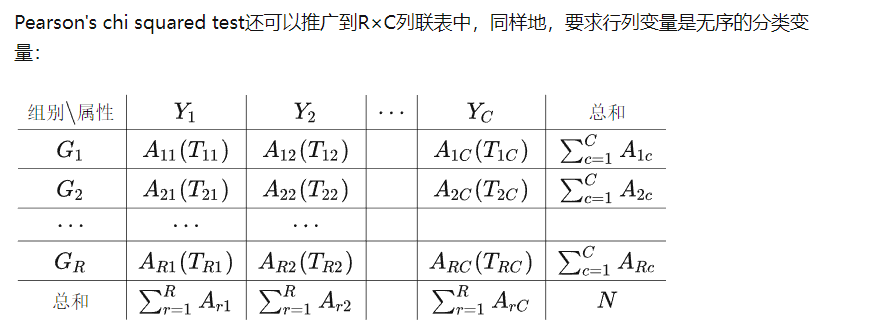

理论频数 $T_{i j}=\frac{\sum_{c=i}^C A_{i c} \sum_{r=1}^R A_{r j}}{N}$ ，有:
$$
\chi_{\text {Pearson }}^2=\sum_{i=1}^R \sum_{j=1}^C \frac{\left(A_{i j}-T_{i j}\right)^2}{T_{i j}} \sim \chi^2((R-1)(C-1))
$$
该公式也有一个不用计算理论频数的简化版:
$$
\chi_{\text {Pearson }}^2=N\left(\sum_{i=1}^R \sum_{j=1}^c \frac{A_{i j}^2}{\sum_{c=i}^C A_{i c} \sum_{r=1}^R A_{r j}}-1\right) \sim \chi^2((R-1)(C-1))
$$
左边括号中的分母其实就是第 $i$ 行的总和乘以第 $j$ 列的总和。

倘若 $H_0$ 成立，上述统计量理应不会很大，取定显著性水平 $\alpha$ 后，若计算出来的 $\chi_{\text {Pearson }}^2>\chi_{\alpha, 1}^2$ ， 则拒绝 $H_0$ ，接受 $H_1$ ，认为 “属性" 和 “组别" 有关 。

In [ ]:
# 代码：https://www.kaggle.com/code/ouwyukha/day-1-additional-material-chi-squared-test

**McNemar's test**

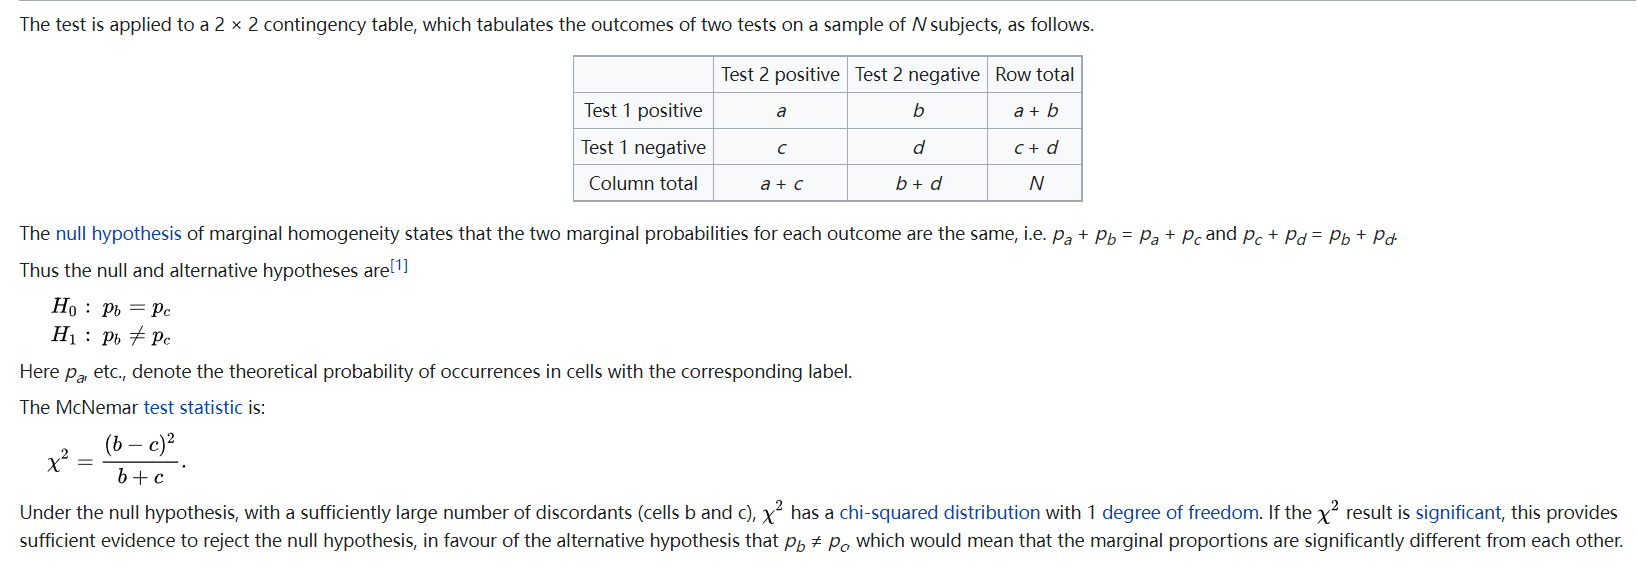

统计量：$$\chi ^{2}={(b-c)^{2} \over b+c}.$$

In [ ]:
# Example of calculating the mcnemar test
from statsmodels.stats.contingency_tables import mcnemar
# define contingency table
table = [[4, 2],
		 [1, 3]]
# calculate mcnemar test
result = mcnemar(table, exact=True)
# if all cells used in the calculation of the test statistic in the contingency table 
# have a value of 25 or more, then the standard calculation of the test can be used
# stat, p = mcnemar(table, exact=False, correction=True) 

# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')

### F检验的介绍

F检验是被誉为现代统计学之父的R.A. Fisher爵士提出、由George W. Snedecor命名的统计检验方法，主要用于方差齐性检验、方差分析等等。它是一种在零假设（null hypothesis, H0）之下，统计值服从F-分布的检验。

本节介绍F检验的如下应用：

- 方差齐性检验（F-test of equality of variances）
- 方差分析（Analysis of Variance, ANOVA）
- 线性回归方程整体的显著性检验




#### 方差齐性检验

**概念理解**

方差齐性检验是数理统计学中检查不同样本的总体方差是否相同的一种方法，基本原理是先对总体的特征作出某种假设，然后通过抽样研究的统计推理，对此假设应该被拒绝还是接受作出推断。 

>方差分析 (ANOVA) 和回归等许多统计过程都假定：虽然不同样本可能来自均值不同的总体，但它们的方差都相同。

方差齐性检验的目的就是看我们拿到的两个样本的波动是否是一样的。如果方差不一样，我们就无法比较这两个样本所代表的整体哪个更好。

比如说，两个人比赛跳远，其中一个人是晴天跳远，地很干，摩擦力大，所以他跳远距离的数据的方差很小。另一个人在雨天跳远，地上很滑，那么他跳远距离的数据的方差就很大。我们就无法判断谁比谁跳得好，因为地面状态这个噪声（Noise）的影响实在是太大了。

在实际应用时，我们无法知晓所有的Noise是否是一样的，因为干扰项实在是太多了。所以，我们通过比较方差是否一致，来判断收集的数据中的噪声是否是差不多的。

常用的方法有：方差比、Hartley检验、Levene检验、BF法、Bartlett检验。这里只研究方差比和Levene检验。

**方差比齐次检验**

目的：方差齐性是方差分析和一些均数比较$t$检验的重要前提，利用$F$检验进行方差齐性检验是最原始的，但对数据要求比较高。

要求：样本来自两个独立的、服从正态分布的总体。



> 这里直接copy了一些资料，最后会附上参考的文章）把公式再码一遍是数模也要用🙃

记两独立总体为：
$$X_1 \sim N(\mu_1, \sigma_1^2), X_2 \sim N(\mu_2, \sigma_2^2)$$
从两总体中抽取的样本为：
$$X_{1i}(i=1,2,...,n_1),X_{2j}(j=1,2,...,n_2)$$
定义样本均值和样本方差：
$$\bar X_1 = {1\over n_1}\sum_{i=1}^{n_1}X_{i1},s_1^2 = {1\over n_1 - 1}\sum_{i=1}^{n_1}(X_{i1}-\bar X_1)^2$$
$$\bar X_2 = {1\over n_2}\sum_{i=1}^{n_2}X_{i2},s_1^2 = {1\over n_2 - 1}\sum_{i=1}^{n_2}(X_{i1}-\bar X_2)^2$$
方差齐性双侧检验的原假设和备择假设：
$$H_0:\sigma_1^2 = \sigma_2^2$$
$$H_0:\sigma_1^2 \neq \sigma_2^2$$
由$F$分布的构造定义：
$${{s_1^2 / \sigma_1^2}\over {s_2^2 / \sigma_2^2}} \sim F(n_1 - 1, n_2 - 1)$$
其中$n_1-1、n_2-1$分别是分子自由度和分母自由度。

在$H_0$成立的条件下，即$\sigma_1^2 = \sigma_2^2$成立的条件下：
$${s_1^2 \over s_2^2} \sim F(n_1-1,n_2-1)$$

一般约定取较大的方差作为分子，较小的方差作为分母，这样计算出来的$F>1$，缩小了范围，便于查表做出结论。给定显著性水平$\alpha$，利用样本数据计算统计量$F_1 = {s_1^2 \over s_2^2}$，若$F_1 > F_{\alpha,(n_1-1,n_2-1)}$，这在一次抽样中几乎是不可能发生的（其发生的可能性为值）此时拒绝原假设，认为方差不齐，否则就不拒绝原假设（即认为方差齐）。



**Levene检验**

Levene检验是将每个值先转换为为该值与其组内均值的偏离程度，然后再用转换后的偏离程度去做方差分析，即组间方差/组内方差。

Levene检验不需要正态性假设，这点和基于$F$检验的方差比方法不同，说明该方法更具有稳健性。

检验假设$H_0:\sigma_1=\sigma_2=...=\sigma_k$，即各处理组方差相等。$H_1:\sigma_i \neq \sigma_j$，各处理组方差不全相等。

计算检验统计量$W$值：

$$W=\frac{(N-k) \sum_{i=1}^k N_i\left(\bar{Z}_{i \cdot}-\bar{Z}_{..}\right)^2}{(k-1) \sum_{i=1}^k \sum_{j=1}^{N_i}\left(\bar{Z}_{i j}-\bar{Z}_{i \cdot}\right)^2}$$
其中：$W$为Levene检验统计量，$k$为样本组数，$N_i$为第$i$个样本的含量，$N$为各样本含量之和，$Z_{ij}$为将原始数据经数据转换后的新的变量值。$\bar Z_{i.}$为第$i$个样本的均数，$\bar Z_{..} $为全部数据的总的均数。

$Z_{ij}$可以定义为下列三种定义之一：
1. $Z_{ij}=|Y_{ij} - \bar Y_{i.}|$，其中$Y_{ij}$是原始数据，$\bar Y_{i.}$是原始数据中第i个样本的算数平均数。
2. $Z_{ij}=|Y_{ij} - \widetilde Y_{i.}|$，其中$\widetilde Y_{i.}$是原始数据中第i个样本的中位数。
3. $Z_{ij}=|Y_{ij} - \bar Y_{i.}'|$，其中$\bar Y_{i.}'$是原始数据中第i个样本的10%调整均数。

10%调整均数是指去除小于$P_5$和大于$P_{95}$的数据后，计算在$P_{5}$和$P_{95}$之间数据的算数平均。

以上对原始数据的转换均取了差值的绝对值，这三种转换方式就确定了Levene检验具有较好的稳健性和把握度。对原始数据的转换方式不同，计算的Levene统计量的大小也有所不同。SPSS中的Levene检验使用了第一种转换方式。三种数据转换方式可以适用于不同的数据类型，第一种主要用于对称分布或正态分布的资料，第二种转换方式可可用于偏态分布的资料，第三种转换方式可用于有极端值或离群值的资料。

判断原则：Levene检验统计量$W$服从自由度为$\nu_1 = k-1, \nu_2=N-k$的$F$分布。
$$W \sim F(k-1,N-k)$$

当$W \geq F(\alpha, k-1,N-k)$ 时，则$P \leq \alpha$，在$\alpha$水准上拒绝$H_0$，接受$H_1$。

下面一个小demo看看测试集训练集方差的齐次性

数据：https://www.kaggle.com/code/bahaulug/a-b-testing/notebook

In [ ]:
df_control = pd.read_excel("ab_testing.xlsx",sheet_name= "Control Group")
df_test = pd.read_excel("ab_testing.xlsx",sheet_name= "Test Group")

In [ ]:
# example
from scipy.stats import levene
test_stat, pvalue = levene(df_control['Purchase'],  df_test['Purchase']) # 也可以多组比较，这里只用了两组
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


p-value > $\alpha$值，所以接受原假设，也就是方差齐次。

#### 方差分析

所有的方差分析研究的都是因子的不同水平是否有差异，这个差异就是看同一因子的各个水平下的指标的均值的差异是否显著。但是我们又不能想当然把各个水平下指标的均数直接计算进行比较，因为还要考虑抽样的随机性，要用假设检验和概率分布来处理这个问题，如何度量“抽样得到的各个水平的差异'更多地'是来自各个水平自身的差异，'较少地'来自抽样误差便成了这个假设检验问题的关键。


>这里只去说one-way ANOVA(单因素方差分析)

**计算流程**

假设：
- 方差的齐性（同质性，homogeneity of variance）。
- 族群遵循正态分布；
- 每一次抽样都是独立的。

变量说明：
- $y_{ij}$是第i个水平第j次试验得到的指标
- $\bar y_{i.}$是第i个水平的样本均值
$$y_{i j} \sim N\left(\mu_i, \sigma^2\right) \quad i=1,2, \cdots, r$$

我们取各个总体的均值：$\mu_1,\mu_2,...,\mu_r$做出假设：
$$\begin{aligned}
&H_0: \mu_1=\mu_2=\cdots=\mu_n \\
&H_1: \mu_1, \mu_2, \cdots, \mu_r \text{ not all equal
}
\end{aligned}$$

**组内偏差平方和**，或称为误差偏差平方和（Sum of Square Error, SSE）
$$S S E=\sum_{i=1}^r \sum_{j=1}^m\left(y_{i j}-\overline{y_i}\right)^2$$


**组间偏差平方和**（Sum of Square Between Groups）
$$S S A=\sum_{i=1}^r \sum_{j=1}^m\left(\overline{y_i \cdot}-\bar{y}\right)^2$$

**组间偏差平方和**（Sum of Square Between Groups）
$$\begin{aligned}
S S A &=\sum_{i=1}^r \sum_{j=1}^m\left(\overline{y_i \cdot}-\bar{y}\right)^2 =\sum_{i=1}^r m\left(\overline{y_i \cdot}-\bar{y}\right)^2
\end{aligned}$$


ANOVA是通过分析如下统计量来做出结论：
$$F=\frac{S S A / df_1}{S S E / df_2}$$

取显著性水平$\alpha$，当利用数据算得的$F=\frac{M S A}{M S E}>F_{\alpha,(r-1, n-r)}$，可以认为再这一次抽样中几乎不可能发生，从而拒绝原假设，认为因素$A$显著。




其中$SSA$是各个水平之间的偏差平方和，也可以说成是组间平方和（Sum of Square Between Groups），$SSE$是各个水平内部的偏差平方和，可以说成是组内偏差平方和，可以理解为上面说的误差的平方和（Sum of Square Error），$df_1$，$df_2$分别是它们的自由度。不直接把$SSA/SSE$作为评判依据，而是各自除以了自由度是因为偏差平方和会因不同组元素数量而有差异，除以自由度就得到了方差，确保这两个偏差平凡和在平均意义下是可比的。

> 这样处理的intuition可以看这个:[link](https://zhuanlan.zhihu.com/p/57896471?utm_source=qq&utm_medium=social&utm_oi=696809991633371136)





**数学推导**

接下来证明这个式子确实是遵循$F-distribution$。

符号说明：
- $\mu_i$是第i个水平的总体均值
- $\bar y_{i.}$是第i个水平的样本均值
- $\epsilon_{ij}$是第i个水平第i个试验值与该水平总体均值的差，反映了第i个水平内部各个试验的误差
- $\epsilon_{i。}$是第i个水平样本均值和总体均值的差，反映了第i个水平内部试验的平均误差
- $a_i$是第i个水平的总体均值与总均值的差，称为主效应，反映了第i个水平平均而言对指标的作用
- $\bar \epsilon$是样本的总均值和总体的总均值的差，反映了样本与总体之间平均而言的误差

$$y_{i j} \sim N\left(\mu_i, \sigma^2\right) \quad i=1,2, \cdots, r$$
我们取各个总体的均值：$\mu_1,\mu_2,...,\mu_r$做出假设：
$$\begin{aligned}
&H_0: \mu_1=\mu_2=\cdots=\mu_n \\
&H_1: \mu_1, \mu_2, \cdots, \mu_r 
\end{aligned}$$不全相等
这里的$\mu_i$是总体的均值，是客观存在的固定的常数，但我们未知，我们就是要利用方差分析来判断它们在统计学意义上是否相等。

设每个水平$i(i=1,2,...,r)$进行了$m$次试验，则总试验次数$n=mr$。每个水平$i(i=1,2,...,r)$下试验得到的数据$y_{ij}(j=1,2,...,m)$与该水平总体的均值$\mu_i$是有差异的，我们记这个差异为：
$$\varepsilon_{i j}=y_{i j}-\mu_i \sim N\left(0, \sigma^2\right)$$
$$y_{i j}=\mu_i+\varepsilon_{i j}$$
接着我们定义总体的总均值：
$$\mu=\frac{1}{r} \sum_{i=1}^r \mu_i$$
定义因素$A$第$i$水平的主效应=第$i$个水平的总体均值与总均值的差（主效应的概念在试验设计中很重要）：
$$a_i=\mu_i-\mu$$
以$\overline{y_{i .}}=\frac{1}{m} \sum_{j=1}^{m_i} y_{i j}$表示第i个水平的样本均值，定义第$i$个水平的样本均值和总体均值的差：
$$\overline{\varepsilon_i .}=\overline{y_{i .}}-\mu_i$$
定义样本总均值：
$$\bar{y}=\frac{1}{n} \sum_{i=1}^r \sum_{j=1}^m y_{i j}$$

样本的总均值和总体的总均值的差：
$$\overline{\varepsilon}=\overline{y}-\mu$$

具体证明可以看b乎，这里先略过。


这里证明一个小结论$SST = SSE + SSA$

$$\begin{aligned}
S S T &=\sum_{i=1}^r \sum_{j=1}^m\left(y_{i j}-\bar{y}\right)^2 \\
&=\sum_{i=1}^r \sum_{j=1}^m\left[\left(y_{i j}-\overline{y_{i .}}\right)+\left(\overline{y_i}-\bar{y}\right)\right]^2 \\
&=\sum_{i=1}^r \sum_{j=1}^m\left(y_{i j}-\overline{y_i .}\right)^2+\sum_{i=1}^r \sum_{j=1}^m\left(\overline{y_{i \cdot}}-\bar{y}\right)^2+2 \sum_{i=1}^r \sum_{j=1}^m\left(\overline{y_{i .}}-\bar{y}\right)\left(y_{i j}-\overline{y_{i .}}\right) \\
&=S S E+S S A+0=S S E+S S A
\end{aligned}$$

利用了小技巧：
$$\sum_{i=1}^r \sum_{j=1}^m\left(\overline{y_i .}-\bar{y}\right)\left(y_{i j}-\overline{y_{i .}}\right)=\sum_{i=1}^r\left[\left(\overline{y_i .}-\bar{y}\right) \sum_{j=1}^m\left(y_{i j}-\overline{y_i .}\right)\right]=0$$

这里随机生成了一些数据来做个示例：

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races, p = [0.05, 0.15 ,0.25, 0.05, 0.5],size=1000)

voter_age = stats.poisson.rvs(loc=18, mu=30, size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

### T检验的介绍

t检验的前提是要求样本服从正态分布或近似正态分布，不然可以利用一些变换（取对数、开根号、倒数等等）试图将其转化为服从正态分布是数据，如若还是不满足正态分布，只能利用非参数检验方法。不过当样本量大于30的时候，可以认为数据近似正态分布。



t检验最常见的四个用途：
- 单样本均值检验（One-sample t-test） 用于检验**总体方差未知、正态数据或近似正态的 单样本的均值 是否与 已知的总体均值相等** 
- 两独立样本均值检验（Independent two-sample t-test） 用于检验 **两对独立的 正态数据或近似正态的 样本的均值 是否相等**，这里可根据总体方差是否相等分类讨论 
- 配对样本均值检验（Dependent t-test for paired samples） 用于检验 **一对配对样本的均值的差 是否等于某一个值**
- 回归系数的显著性检验（t-test for regression coefficient significance） 用于检验 **回归模型的解释变量对被解释变量是否有显著影响**

**计算流程**：


1.单样本均值检验

目的：检验单样本的均值是否和已知总体的均值相等。

要求：
- 总体方差未知，否则就可以利用检验（也叫检验，就是正态检验）
- 正态数据或近似正态

检验原理：

$H_0$：样本均值与总体均值相等

$H_1$：样本均值与总体均值不等

记总体均值为 $\mu$ ，总体方差为 $\sigma^2$ (末知)，样本均值 $\bar{X}=\frac{1}{n} \sum_{i=1}^n X_i$ ，样本标准差 $s=\sqrt{\frac{1}{n-1} \sum_{i=1}^n\left(X_i-\bar{X}\right)^2}$ ，有:
$$
\begin{aligned}
X_i \sim N\left(\mu, \sigma^2\right) 
\end{aligned}
$$
$$
\begin{aligned}
 \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}=\frac{\sqrt{n}(\bar{X}-\mu)}{\sigma} \sim N(0,1)
\end{aligned}
$$

$$
\frac{(n-1) s^2}{\sigma^2} \sim \chi^2(n-1)
$$

$$
\frac{\frac{\sqrt{n}(\bar{X}-\mu)}{\sigma}}{\sqrt{\frac{\frac{(n-1) s^2}{\sigma^2}}{n-1}}}=\frac{\sqrt{n}(\bar{X}-\mu)}{s} \sim t(n-1)
$$

检验原理
在 $H_0$ 成立的条件下， $\bar{X}-\mu=0$ ，若上述统计量的值偏离 0 "太多"，是小概率事件，在一次抽 样中几乎不可能发生，其发生的概率即为 $p$ 值。给定显著性水平 $\alpha$ (如0.05)，根据研究的问题确定 是双侧检验（two-side test）还是单侧检验 (one-side test)，若为双侧检验，则查t界值表中自 $\alpha$ ，得到临界值 $t_{\alpha, n-1}$ 。
1. 对于要检验样本均值是否等于总体均值的双侧检验，若根据样本数据算出来的统计量的绝对值 $\left|\frac{\sqrt{n}(\bar{X}-\mu)}{s}\right|>t_{\frac{\alpha}{2}, n-1}$ ，则拒绝原假设，认为样本均值与总体均值不等，否则不拒绝原假设。
2. 对于要检验样本均值是否比总体均值大的单侧检验，若根据样本数据算出来的统计量 $\frac{\sqrt{n}(\bar{X}-\mu)}{s}<t_{\alpha, n-1}$ ，则拒绝原假设，认为样本均值不大于总体均值，否则不拒绝原假设。
3. 对于要检验样本均值是否比总体均值小的单侧检验，若根据样本数据算出来的 $t$ 统计量 $\frac{\sqrt{n}(\bar{X}-\mu)}{s}>t_{\alpha, n-1}$ ，则拒绝原假设，认为样本均值不小于总体均值，否则不拒绝原假设。

2.配对样本均值检验

要求:
1. 总体方差相等
2. 正态数据或近似正态

既然是配对设计，不妨设 $n=n_1=n_2$ ；方差相等，有 $\sigma^2=\sigma_1^2=\sigma_2^2$ 。取要检验的指标的差值 $d_i=X_{1 i}-X_{2 i}$ ，计算 $d_i$ 的样本标准差 $s_d=\sqrt{\frac{1}{n-1} \sum_{i=1}^n\left(d_i-\bar{d}\right)^2}$ 。要检验配对样本均数的 差是否为 0 ，即检验 $d_i$ 的均值是否为 0 ，这样就转化为了 "1. 单样本检验" ，由于正态性和方差相等 的假定，差值的均值 (以大写字母表示随机变量，小写字母表示样本取值) :

$$\bar{D}=\bar{X}_1-\bar{X}_2 \sim N\left(\mu_1-\mu_2, \frac{2 \sigma^2}{n}\right)$$

从而:
$$\frac{\bar{D}-\left(\mu_1-\mu_2\right)}{\sigma \sqrt{\frac{2}{n}}} \sim N(0,1) \quad$$

构造 $\chi^2$ 变量:

$$\frac{(n-1) s_d}{\frac{2 \pi^2}{n}} \sim \chi^2(n-1) \quad$$

化简整理得到:
$$\frac{\sqrt{n}\left(\bar{D}-\left(\mu_1-\mu_2\right)\right)}{s_d} \sim t(n-1) \quad$$

同样地，在 $H_0$ 成立的条件下， $\mu_1-\mu_2=0$ 。根据研究的问题确定是双侧检验 (two-side test) 还是单侧检验（one-side test)，若为双侧检验，则查t界值表中自由度为 $n-1$ ，双侧 $\alpha$ ，得到临 界值 $t_{\frac{\alpha}{2}, n-1}$ ；若为单侧检验，则查 $t$ 界值表中自由序为 $n-1$ ，双侧 $\alpha$ ，得到临界值 $t_{\alpha, n-1 \text { 。 }}$

检验原理
1. 对于要检验差值的均值是否为 0 的双侧检验，若根据样本数据算出来的 $t$ 统计量的绝对值
2. 对于要检验 $\mu_1>\mu_2$ 的单侧检验，若根据样本数据算出来的 $t$ 统计量 $\frac{\sqrt{n} \bar{D}}{s_d}<t_{\alpha, n-1}$ ，则拒绝原 假设，认为 $\mu_1 \leq \mu_2$ ，否则不拒绝原假设。
3. 对于要检验 $\mu_1<\mu_2$ 的单侧检验，若根据样本数据算出来的 $t$ 统计量 $\frac{\sqrt{n} \bar{D}}{s_d}>t_{\alpha, n-1}$ ，则拒绝原 假设，认为 $\mu_1 \geq \mu_2$ ，否则不拒绝原假设。



### 回归分析中用到的假设检验

- 多元回归分析中的t检验和F检验如何使用？ - 田品的回答 - 知乎
https://www.zhihu.com/question/43146224/answer/2312158121

In [ ]:
# 这个一般都是用statsmodels这个库，然后看summary的时候会有F-statistics和p值，可以看后面的回归分析那节的介绍
# 虽然sklearn库也能做，但是操作和显示的结果还是不如statsmodel的，以后默认直接是用statsmodels

# Data Analysis Pipeline

十分naive的小案例：
- https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#acknowledgements

![](https://miro.medium.com/max/3300/1*c9mmBc2UJ-aQRGANRP0bJg.png)

![](https://assets-global.website-files.com/620d42e86cb8ec4d0839e59d/6230e9ee021b250dd3710f8e_61ca4fbcc80819e696ba0ee9_Feature-Engineering-Machine-Learning-Diagram.png)

这个文章写的是真的挺好的👍：
- https://dasarpai.com/eda-feature-engineering-101/

说实话有些过程也不需要分的那么开，很多时候都是需要反复不断分析，没有一蹴而就的方法，是需要针对问题去不断迭代分析 :)

但是总的来说还是要对不同的阶段形成分析的习惯，防止遗漏。

数据处理和特征选择的依据就是EDA的方法，而EDA本身也会有其他的分析，特征工程

一般的，流程可以如下划分，先对于初始数据集的EDA，然后进行数据处理和特征工程特征选择，对于新的特征集，也可能会用到EDA的一些方法，然后就是结合模型效果再去优化。

再细分的总结：

首先是明确处理的任务是什么，数据集来源是什么，这个任务的背景是什么，有没有什么已经可利用的模型，变量的类别是啥，任务的导向是什么。

然后如果是监督学习就是看数据集分布，有没有偏差，要不要考虑欠采样过采样，再看数据缺失、重复、离群值的情况，针对每个单变量看看分布，再去看看变量之间的联系，比如各种相关系数，如果共线性很多看看要不要降维处理，还有变量的不同水平（取值）对于target变量有没有显著性差异，怎么去根据已有的信息去构建合适的统计量来创建更好的特征，更具有问题导向。

## EDA

### Case1
因变量为连续变量or混合变量，target为类别变量的分类情况：
https://github.com/XuRui314/MathematicalModeling/blob/main/Wine_Quality.ipynb

这个基本上属于是最简单的情况了，看看缺失值和异常值，拿箱线图看看，分别看看每个变量的kde分布，看看正态性，transform（根据skew的Box Cox Transformation）一下再看看正态性，做做ANOVA或者t test，再看看Multivariate之间的关系，有没有线性，seaborn的pairplot画画，用Violinplot看看单变量和target为hue的关系，降维聚类看看。

画这种散点的方法：

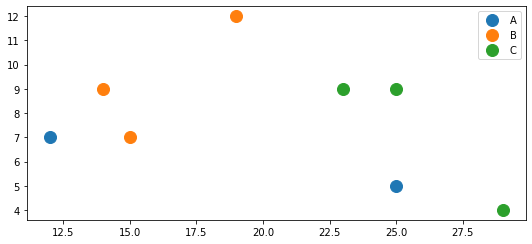

In [ ]:
import matplotlib.pyplot as plt
# 对于分组变量的处理


import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': [25, 12, 15, 14, 19, 23, 25, 29],
                   'y': [5, 7, 7, 9, 12, 9, 9, 4],
                   'z': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']})

groups = df.groupby('z')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

plt.legend()


### Case2
因变量是连续变量or混合变量，target也为连续变量的情况：


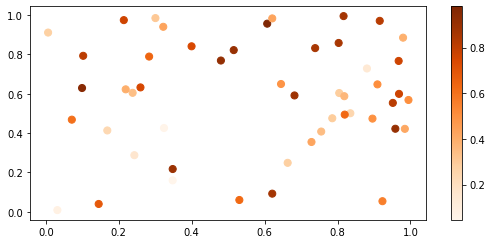

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x, y, z = np.random.rand(3, 50)
f, ax = plt.subplots()

points = ax.scatter(x, y, c=z, s=50, cmap="Oranges")
f.colorbar(points)

plt.show()


### Case3
都是分类变量，这玩意也不太可能出现哈  :)

## 特征工程

- https://www.kaggle.com/code/prashant111/a-reference-guide-to-feature-engineering-methods

- https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

## 特征选择

主要还是侧重于记录，这里一次性写全一点，防止有时候想不起来。
- https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook

上面那个kaggle写的还算全，但只是理论上的，那个给的例子不是很好，可以结合这个看看：
- https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

In [ ]:
# 代码看这里
# https://github.com/XuRui314/MathematicalModeling/blob/main/Multivariate_Analysis.ipynb

# Analysis Methods Introduction

本节将侧重于介绍多元分析中用到的方法，数学推导和代码封装。

## 判别分析

简单来说就是分类，这里主要研究的方法：
- SVM
- LDA
- 随机森林
- Logistic回归
- Xgboost

### SVM

SVM是寻找最佳超平面，也就是以最大间隔把两类样本分开的超平面，达到分类效果的一种方法。将问题转换为：
$$\min \frac{1}{2}\|w\|^2 \quad \text { s.t. }, y_i\left(w^T x_i+b\right) \geq 1, i=1, \ldots, n$$
利用对偶性质，可以进一步转换为：
$$\begin{gathered}
\max _\alpha \sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i, j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text { s.t. }, \alpha_i \geq 0, i=1, \ldots, n \\
\sum_{i=1}^n \alpha_i y_i=0
\end{gathered}$$
利用核函数可以转换为：
$$\begin{aligned}
\max _\alpha & \sum_{i=1}^n \alpha_i-\frac{1}{2} \sum_{i, j=1}^n \alpha_i \alpha_j y_i y_j \kappa\left(x_i, x_j\right) \\
s . t ., & \alpha_i \geq 0, i=1, \ldots, n \\
& \sum_{i=1}^n \alpha_i y_i=0
\end{aligned}$$

训练的方法可以采用SMO，或梯度下降法，这里介绍SMO：

(1) 计算误差:
$$
E_i=\left(\sum_{j=1}^N \alpha_j y_j K\left(\boldsymbol{x}_j, \boldsymbol{x}_i\right)+b\right)-y_i, i=1,2
$$
(2) 计算上下边界 $\mathrm{L}, \mathrm{H}$
$$
\left\{\begin{array}{l}
L=\max \left(0, \alpha_2^{\text {old }}-\alpha_1^{\text {old }}\right), H=\min \left(C, C+\alpha_2^{\text {old }}-\alpha_1^{\text {old }}\right), y_1 \neq y_2 \\
L=\max \left(0, \alpha_2^{\text {old }}+\alpha_1^{\text {old }}-C\right), H=\min \left(C, \alpha_2^{\text {old }}+\alpha_1^{\text {old }}\right), y_1=y_2
\end{array}\right.
$$
(3) 计算 $\eta$
$$
\eta=K_{11}+K_{22}-2 K_{12}=\left\|\phi\left(\boldsymbol{x}_1\right)-\phi\left(\boldsymbol{x}_2\right)\right\|^2
$$
(4) 更新 $\alpha_2$
$$
\alpha_2^{\text {new,unc }}=\alpha_2^{\text {old }}+\frac{y_2\left(E_1-E_2\right)}{\eta}
$$
（5）根据取值范围修前 $\alpha_2$
$$
\alpha_2^{n e w}=\left\{\begin{array}{l}
H, \quad \alpha_2^{\text {new,unc }}>H \\
\alpha_2^{\text {new,unc }}, L \leq \alpha_2^{\text {new,unc }} \leq H \\
L, \quad \alpha_2^{\text {new,unc }}<L
\end{array}\right.
$$
(6) 更新 $\alpha_1$
$$
\alpha_1^{\text {new }}=\alpha_1^{\text {old }}+y_1 y_2\left(\alpha_2^{\text {old }}-\alpha_2^{\text {new }}\right)
$$
(7) 更新 $b_1^{n e w}, b_2^{n e w}, b^{n e w}$
$$
\begin{aligned}
&b_1^{\text {new }}=-E_1-y_1 K_{11}\left(\alpha_1^{\text {new }}-\alpha_1^{\text {old }}\right)-y_2 K_{21}\left(\alpha_2^{\text {new }}-\alpha_2^{\text {old }}\right)+b^{\text {old }} \\
&b_2^{\text {new }}=-E_2-y_1 K_{12}\left(\alpha_1^{\text {new }}-\alpha_1^{\text {old }}\right)-y_2 K_{22}\left(\alpha_2^{\text {new }}-\alpha_2^{\text {old }}\right)+b^{\text {old }} \\
&b^{\text {new }}=\frac{b_1^{\text {new }}+b_2^{\text {new }}}{2}
\end{aligned}
$$

### LDA


LDA对数据分布比较敏感，要提前标准化。

输入：数据集 $D=\left(x_1, y_1\right),\left(x_2, y_2\right), \ldots,\left(x_m, y_m\right)$,假设第K类样本的数据集为$D_k$，其中，任意样本 $x_i$ 为 $n$ 维向量，$m_j=\frac{1}{N_j} \sum_{x \in D_j} x(j=0,1)$是第j类样本的均值向量，变化后的样本的均值向量$\tilde{m}$为$\frac{\sum_{\tilde{x} \in D_k} \tilde{x}}{N_k}$，$y_i \in\left\{C_1, C_2, \ldots, C_k\right\}$,降维到的维度为 $d$.
输出：降维后的数据集 $D^{\prime}$.
1. 计算类内散度矩阵 $S_w=\sum_{k=1}^K\left(\frac{\sum_{x \in D_k} x x^T}{N_k}-m_k m_k^T\right)$
2. 计算类间散度矩阵 $S_b=\sum_{\substack{i, j \\ i \neq j}}\left[\left(m_i-m_j\right)\left(m_i-m_j\right)^T\right]$ 
3. 计算矩阵 $S_w^{-1} S_b$
4. 计算矩阵 $S_w^{-1} S_b$ 的特征值与特征向量，按从小到大的顺序选取前 $d$ 个特征值和对应的 $d$ 个特 征向量 $\left(w_1, w_2, \ldots, w_d\right)$ ，得到投影矩阵 $W$.
5. 对样本集中的每一个样本特征 $x_i$ ，转化为新的样本 $z_i=W^T x_i$
6. 得到输出样本集 $D^{\prime}=\left\{\left(z_1, y_1\right),\left(z_2, y_2\right), \ldots,\left(z_m, y_m\right)\right\}$

Prediction: https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/

先投影，再用处理好的数据去预测：

In [ ]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy1.0


直接用LDA去预测：

In [ ]:
lda = LDA(n_components=2) #creating a LDA object
lda = lda.fit(X, y) #learning the projection matrix
X_lda = lda.transform(X) #using the model to project X 
# .... getting Z as test data....
Z = lda.transform(Z) #using the model to project Z
z_labels = lda.predict(Z) #gives you the predicted label for each sample
z_prob = lda.predict_proba(Z) #the probability of each sample to belong to each class

### Xgboost

原理谢哥已经写了，我就写写调参和代码的部分。

## 聚类分析

### 高斯混合模型聚类

每个GMM 由 $N$个 Gaussian 分布组成，每个 Gaussian 称为一个“Component”，这些 Component 线性加成在一起就组成了 GMM 的概率密度函数，假定数据是由 GMM 生成出来的：
$$\begin{aligned}
p(x) &=\sum_{k=1}^K p(k) p(x \mid k) \\
&=\sum_{k=1}^K \pi_k \mathcal{N}\left(x \mid \mu_k, \Sigma_k\right)
\end{aligned}$$

算法流程：

1. 估计数据由每个 Component 生成的概率 (并不是每个 Component 被选中的概率)： 对于每个数据 $x_i$ 来说，它由第 $k$ 个 Component 生成的概率为
$$
\gamma(i, k)=\frac{\pi_k \mathcal{N}\left(x_i \mid \mu_k, \Sigma_k\right)}{\sum_{j=1}^K \pi_j \mathcal{N}\left(x_i \mid \mu_j, \Sigma_j\right)}
$$
由于式子里的 $\mu_k$ 和 $\Sigma_k$ 也是需要我们估计的值，我们采用迭代法，在计算 $\gamma(i, k)$ 的 时候我们假定 $\mu_k$ 和 $\Sigma_k$ 均已知，我们将取上一次迭代所得的值（或者初始值）。
2. 估计每个 Component 的参数：现在我们假设上一步中得到的 $\gamma(i, k)$ 就是正确的"数据 $x_i$ 由 Component $k$ 生成的概率"，亦可以当做该 Component 在生成这个数据上所做的 贡献，或者说，我们可以看作 $x_i$ 这个值其中有 $\gamma(i, k) x_i$ 这部分是由 Component $k$ 所生成的。集中考虑所有的数据点，现在实际上可以看作 Component 生成了 $\gamma(1, k) x_1, \ldots, \gamma(N, k) x_N$ 这些点。由于每个 Component 都是一个标准的 Gaussian 分布，可以很容易分布求出最大似然所对应的参数值:
$$
\begin{aligned}
\mu_k &=\frac{1}{N_k} \sum_{i=1}^N \gamma(i, k) x_i \\
\Sigma_k &=\frac{1}{N_k} \sum_{i=1}^N \gamma(i, k)\left(x_i-\mu_k\right)\left(x_i-\mu_k\right)^T
\end{aligned}
$$
其中 $N_k=\sum_{i=1}^N \gamma(i, k)$ ，并且 $\pi_k$ 也顺理成章地可以估计为 $N_k / N$ 。
3. 重复迭代前面两步，直到似然函数的值收敛为止。

## 主成分分析

In [ ]:
# 看做个的对应部分即可
# https://github.com/XuRui314/MathematicalModeling/blob/main/%E6%95%B0%E6%A8%A1%E7%AC%AC%E4%BA%94%E6%AC%A1%E7%BB%83%E4%B9%A0.ipynb

## 因子分析

In [ ]:
# 评价是和PCA差不多其实

## 回归分析

主要分为：
- 线性回归，多项式回归，其他函数形式回归
- Logistics回归
- 多元线性回归，二元多次回归，逐步回归

这里统一采用statsmodels这个库，不用sklearn是因为没这个库好用 :)

In [ ]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/Regression")
!ls

mtcars.csv


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

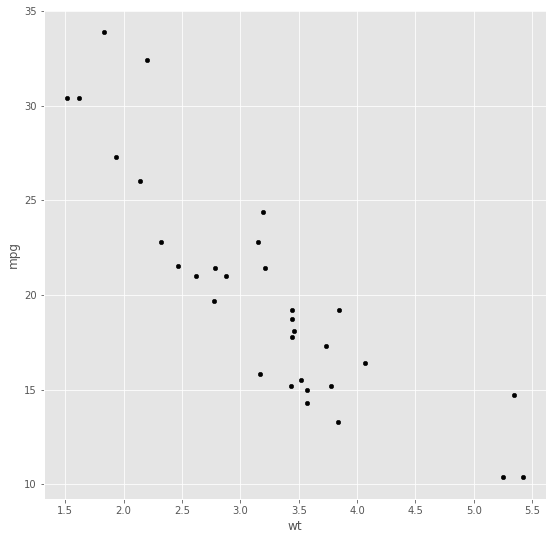

In [ ]:
# Load mtcars data set
mtcars = pd.read_csv("mtcars.csv")

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

可以看到在weight和mpg这两个特征间大体上有着线性关系，所以来试试线性回归。

In [ ]:
from sklearn import linear_model
from sklearn.feature_selection import f_regression

In [ ]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)


37.28512616734204
[-5.34447157]


In [ ]:
# F-test: return F value and p value
f_regression(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"], center=True)

(array([91.375325]), array([1.2939587e-10]))

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:



In [ ]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])


0.7528327936582646

The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, car weight explains roughly 75% of the variance in mpg.

The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:



In [ ]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()


count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

R-squared is calculated as 1 - (SSResiduals/SSTotal) were SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data. We could calculate R-squared by hand like this:



In [ ]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)


0.7528327936582646

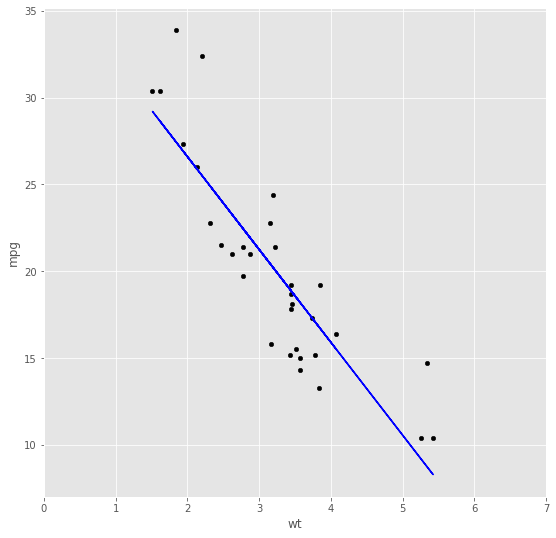

In [ ]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");


Outliers can have a large influence on linear regression models: since regression deals with minimizing squared residuals, large residuals have a disproportionately large influence on the model. Plotting the result helps us detect influential outliers. In this case there does not appear to be any influential outliers. Let's add an outlier--a super heavy fuel efficient car--and plot a new regression model:



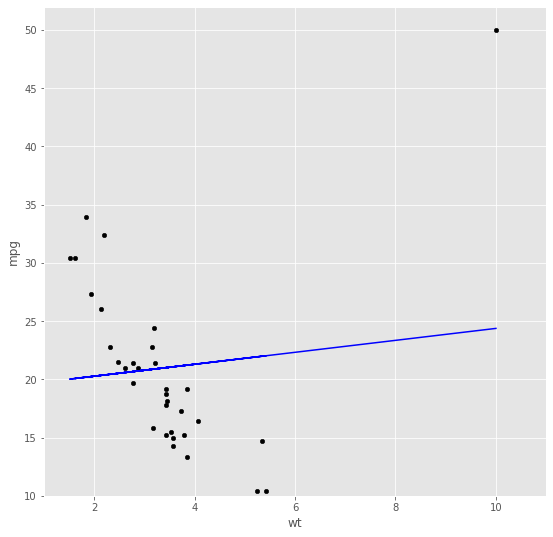

In [ ]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

Although this is an extreme, contrived case, the plot above illustrates how much influence a single outlier can have on a linear regression model.

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:



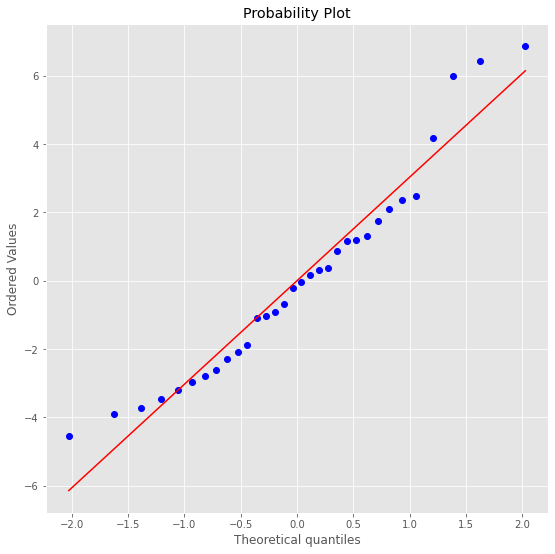

In [ ]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

## 时序分析

这个可能会鸽🤗，但是我会给出一些基本的模型和资料，到时候用到也不至于很乱 :)

In [4]:
!pip install pystan~=2.14
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 88 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638626 sha256=272560f3e61f114d5dccabaa72be42c440c6a07e644f77e245246b86fde8862d
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [6]:
from fbprophet import Prophet
import numpy as np
import pandas as pd


In [10]:
sales_df = pd.read_csv('example_retail_sales.csv')
sales_df

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068
...,...,...
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935


In [11]:
sales_df['y_orig'] = sales_df['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
sales_df['y'] = np.log(sales_df['y'])


In [12]:
model = Prophet() #instantiate Prophet
model.fit(sales_df); #fit the model with your dataframe


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future_data = model.make_future_dataframe(periods=6, freq = 'm')


In [16]:
forecast_data = model.predict(future_data)


In [17]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057452,13.036122,13.076706
295,2016-07-31,13.082138,13.062963,13.102477
296,2016-08-31,13.015388,12.994183,13.037724
297,2016-09-30,13.037709,13.017319,13.059019
298,2016-10-31,13.055578,13.033519,13.077599


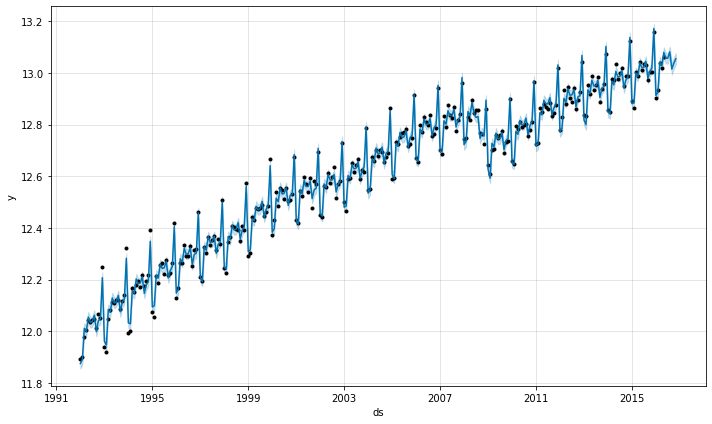

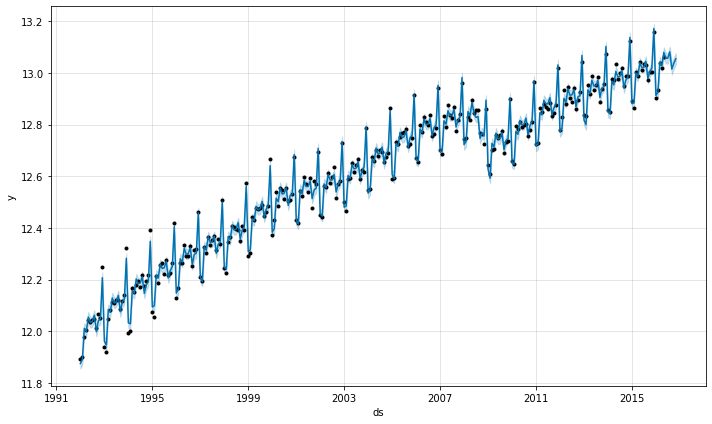

In [18]:
model.plot(forecast_data)


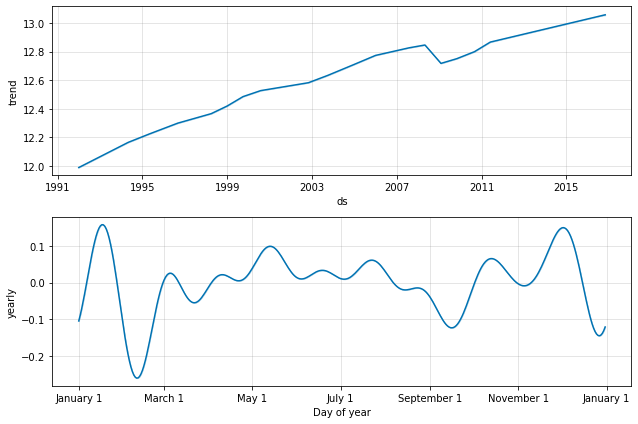

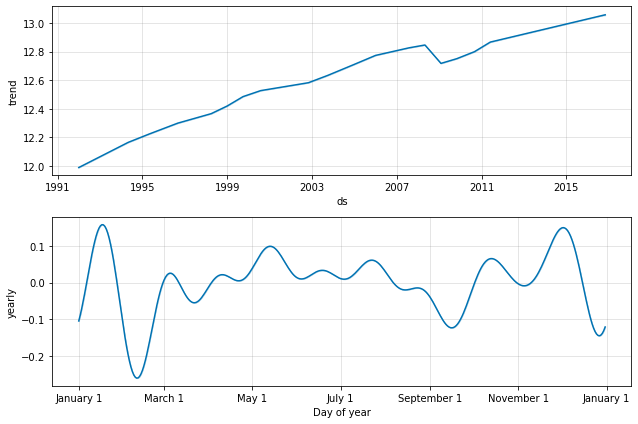

In [19]:
model.plot_components(forecast_data)


In [20]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])


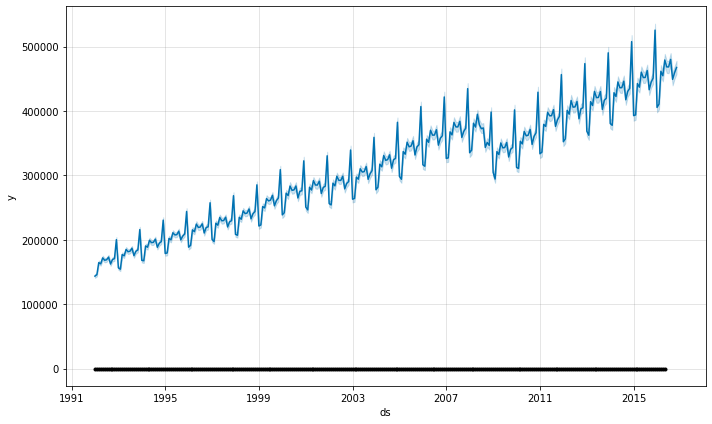

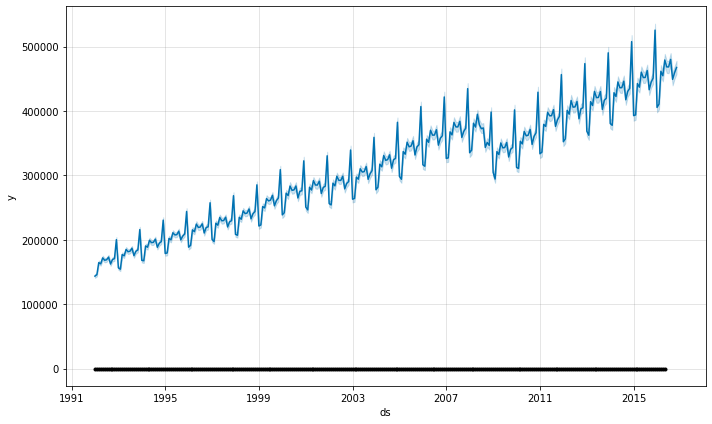

In [21]:
model.plot(forecast_data_orig)


In [22]:
sales_df['y_log']=sales_df['y'] #copy the log-transformed data to another column
sales_df['y']=sales_df['y_orig'] #copy the original data to 'y'


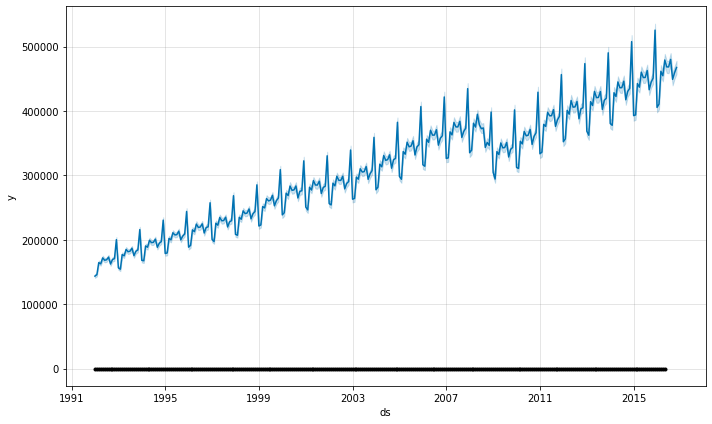

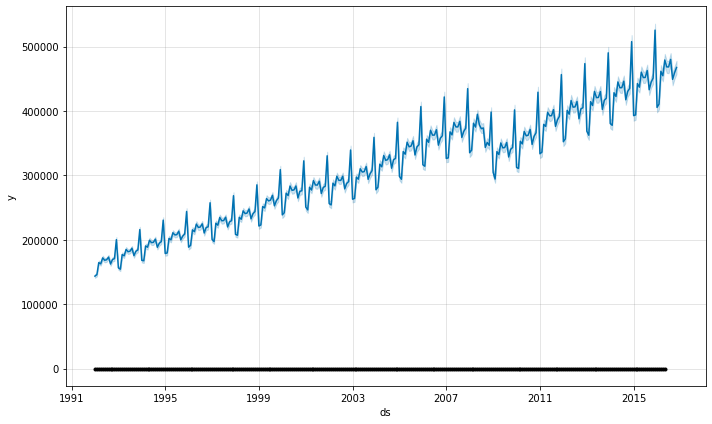

In [23]:
model.plot(forecast_data_orig)


#参考资料
F检验--https://zhuanlan.zhihu.com/p/139151375

时序--https://pythondata.com/forecasting-time-series-data-with-prophet-part-1/